# **Day 4/5**: Python Training

The objective of this notebook is to cover some important concepts which we came across during our day 4 of the python training session. In this notebook, we will quickly cover few important concepts mostly around the 4 mostly used modules for data science related projects in python namely - pandas, numpy, matplotlib, plotly

Refer to the outline of this notebook below to browse through different sections of this notebook.  

## **Table of Contents**  
* [Pandas](#pandas)  
    * [Pandas Installation](#pandas-installation)  
    * [Pandas Usage](#pandas-usage)  
        * [Pandas Object Creation](#pandas-object-creation)  
        * [Pandas Viewing Data](#pandas-viewing-data)  
        * [Pandas Selection](#pandas-selection)  
        * [Pandas Missing Data](#pandas-missing-data)  
        * [Pandas Operations](#pandas-operations)  
        * [Pandas Merge](#pandas-merge)  
        * [Pandas Grouping](#pandas-grouping)  
        * [Pandas Reshaping](#pandas-reshaping)
        * [Pandas Categoricals](#pandas-categoricals)
        * [Pandas Plotting](#pandas-plotting)
* [Numpy](#numpy)  
    * [Numpy Installation](#numpy-installation)  
    * [Numpy Usage](#numpy-usage)  
        * [Numpy Array Creation](#numpy-array-creation)  
        * [Numpy Printing Array](#numpy-printing-array)  
        * [Numpy Operations](#numpy-operations)  
        * [Numpy Universal Functions](#numpy-universal-functions)
* [Matplotlib](#matplotlib)
    * [Matplotlib Installation](#matplotlib-installation)  
    * [Matplotlib Usage](#matplotlib-usage)
* [Plotly](#plotly)
    * [Plotly Installation](#plotly-installation)  
    * [Plotly Usage](#plotly-usage)

## **Pandas**

[Back to contents](#table-of-contents)

### Pandas Installation

In [1]:
!pip install pandas==1.5.3


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Pandas Usage  

10 minutes to Pandas Official Link - [Link](https://pandas.pydata.org/pandas-docs/version/1.4/pandas.pdf)  
Pandas Cookbook - [Link](https://pandas.pydata.org/pandas-docs/version/1.4/pandas.pdf#page=1001&zoom=100,96,657)

In [2]:
import pandas as pd
import numpy as np

#### Pandas Object Creation   

[Back to contents](#table-of-contents)

In [3]:
"""
Pandas have 2 data structures - 1. Series, and 2. Dataframes
Series are 1 dimensional datastruture capable of holding any data type (integers, strings, floats, etc)
Dataframes are 2 dimensional datastructure with columns of potentially different data types or dict of Series objects.
"""
 
# Series
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
# Dataframe with same data type
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.319091,-0.187850,0.823933,1.515348
2013-01-02,-1.105713,0.396794,0.949021,-2.422994
2013-01-03,1.960611,-1.080097,0.007165,0.609201
2013-01-04,0.080207,0.895998,-1.437555,-0.095996
2013-01-05,-1.525408,0.018863,-1.089697,0.219206
2013-01-06,0.794275,0.507464,0.455268,1.871656


In [6]:
# Dataframe with different data types
df2 = pd.DataFrame(
    {
    "A": 1.0,
    "B": pd.Timestamp("20130102"),
    "C": pd.Series(1, index=list(range(4)), dtype="float32"),
    "D": np.array([3] * 4, dtype="int32"),
    "E": pd.Categorical(["test", "train", "test", "train"]),
    "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [7]:
# Extracting data types for each column of dataframe
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

#### Pandas Viewing Data

[Back to contents](#table-of-contents)

In [8]:
# Viewing first 5 rows of the dataframe
df.head()

,A,B,C,D
2013-01-01,-0.319091,-0.187850,0.823933,1.515348
2013-01-02,-1.105713,0.396794,0.949021,-2.422994
2013-01-03,1.960611,-1.080097,0.007165,0.609201
2013-01-04,0.080207,0.895998,-1.437555,-0.095996
2013-01-05,-1.525408,0.018863,-1.089697,0.219206


In [9]:
# Viewing last 5 rows of the dataframe
df.tail()

,A,B,C,D
2013-01-02,-1.105713,0.396794,0.949021,-2.422994
2013-01-03,1.960611,-1.080097,0.007165,0.609201
2013-01-04,0.080207,0.895998,-1.437555,-0.095996
2013-01-05,-1.525408,0.018863,-1.089697,0.219206
2013-01-06,0.794275,0.507464,0.455268,1.871656


In [10]:
# Viewing indexes for the dataframe
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
# Viewing columns of the dataframe
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
# Converting dataframe to numpy array
df.to_numpy()

array([[-0.31909129, -0.18785027,  0.82393258,  1.5153483 ],
       [-1.10571336,  0.39679432,  0.94902083, -2.42299393],
       [ 1.96061126, -1.08009673,  0.00716483,  0.60920069],
       [ 0.08020675,  0.89599776, -1.43755504, -0.09599588],
       [-1.52540767,  0.01886332, -1.0896972 ,  0.21920561],
       [ 0.79427484,  0.50746375,  0.45526782,  1.87165607]])

In [13]:
# Extracting Statistics for each column of the dataframe
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.019187,0.091862,-0.048644,0.282737
std,1.275177,0.688389,1.002660,1.524403
min,-1.525408,-1.080097,-1.437555,-2.422994
25%,-0.909058,-0.136172,-0.815482,-0.017196
50%,-0.119442,0.207829,0.231216,0.414203
75%,0.615758,0.479796,0.731766,1.288811
max,1.960611,0.895998,0.949021,1.871656


In [14]:
# Transposing a dataframe
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.319091,-1.105713,1.960611,0.080207,-1.525408,0.794275
B,-0.187850,0.396794,-1.080097,0.895998,0.018863,0.507464
C,0.823933,0.949021,0.007165,-1.437555,-1.089697,0.455268
D,1.515348,-2.422994,0.609201,-0.095996,0.219206,1.871656


In [15]:
# Sorting a dataframe by index values
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.515348,0.823933,-0.187850,-0.319091
2013-01-02,-2.422994,0.949021,0.396794,-1.105713
2013-01-03,0.609201,0.007165,-1.080097,1.960611
2013-01-04,-0.095996,-1.437555,0.895998,0.080207
2013-01-05,0.219206,-1.089697,0.018863,-1.525408
2013-01-06,1.871656,0.455268,0.507464,0.794275


In [16]:
# Sorting a dataframe by column values
df.sort_values(by="B")

,A,B,C,D
2013-01-03,1.960611,-1.080097,0.007165,0.609201
2013-01-01,-0.319091,-0.187850,0.823933,1.515348
2013-01-05,-1.525408,0.018863,-1.089697,0.219206
2013-01-02,-1.105713,0.396794,0.949021,-2.422994
2013-01-06,0.794275,0.507464,0.455268,1.871656
2013-01-04,0.080207,0.895998,-1.437555,-0.095996


#### Pandas Selection

[Back to contents](#table-of-contents)

In [17]:
# Selecting a specific column by label name
df['A']

2013-01-01   -0.319091
2013-01-02   -1.105713
2013-01-03    1.960611
2013-01-04    0.080207
2013-01-05   -1.525408
2013-01-06    0.794275
Freq: D, Name: A, dtype: float64

In [18]:
# Selecting dataframe rows by indexes
df[3:5]

,A,B,C,D
2013-01-04,0.080207,0.895998,-1.437555,-0.095996
2013-01-05,-1.525408,0.018863,-1.089697,0.219206


In [19]:
# Selecting dataframe rows by index value
df.loc[dates[0]]

A   -0.319091
B   -0.187850
C    0.823933
D    1.515348
Name: 2013-01-01 00:00:00, dtype: float64

In [20]:
# Selecting dataframe rows by row and column indices
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.080207,0.895998
2013-01-05,-1.525408,0.018863


In [21]:
# Selecting dataframe rows by row and column indices in list format
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-1.105713,0.949021
2013-01-03,1.960611,0.007165
2013-01-05,-1.525408,-1.089697


In [22]:
# Selecting a specific cell value
df.iloc[1, 1]

0.39679432402509995

In [23]:
# Selecting dataframe rows by boolean / conditional indexing
df[df["A"] > 0]

,A,B,C,D
2013-01-03,1.960611,-1.080097,0.007165,0.609201
2013-01-04,0.080207,0.895998,-1.437555,-0.095996
2013-01-06,0.794275,0.507464,0.455268,1.871656


In [24]:
# Selecting dataframe values which are greater than zero and eliminating others by replacing
# them with NaN values
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,0.823933,1.515348
2013-01-02,NaN,0.396794,0.949021,NaN
2013-01-03,1.960611,NaN,0.007165,0.609201
2013-01-04,0.080207,0.895998,NaN,NaN
2013-01-05,NaN,0.018863,NaN,0.219206
2013-01-06,0.794275,0.507464,0.455268,1.871656


In [25]:
# Selecting specific dataframe rows by specific column values
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,1.960611,-1.080097,0.007165,0.609201,two
2013-01-05,-1.525408,0.018863,-1.089697,0.219206,four


#### Pandas Missing Data

[Back to contents](#table-of-contents)

In [26]:
# Adding one extra column with NaN values
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1

,A,B,C,D,E
2013-01-01,-0.319091,-0.187850,0.823933,1.515348,NaN
2013-01-02,-1.105713,0.396794,0.949021,-2.422994,NaN
2013-01-03,1.960611,-1.080097,0.007165,0.609201,NaN
2013-01-04,0.080207,0.895998,-1.437555,-0.095996,NaN


In [27]:
# Replacing two row indices for new column with some value
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,E
2013-01-01,-0.319091,-0.187850,0.823933,1.515348,1.0
2013-01-02,-1.105713,0.396794,0.949021,-2.422994,1.0
2013-01-03,1.960611,-1.080097,0.007165,0.609201,NaN
2013-01-04,0.080207,0.895998,-1.437555,-0.095996,NaN


In [28]:
# Dropping dataframe rows with NaN values in E column
df1.dropna(how="any")

,A,B,C,D,E
2013-01-01,-0.319091,-0.187850,0.823933,1.515348,1.0
2013-01-02,-1.105713,0.396794,0.949021,-2.422994,1.0


In [29]:
# Filling NaN values with 5 value for E column
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-0.319091,-0.187850,0.823933,1.515348,1.0
2013-01-02,-1.105713,0.396794,0.949021,-2.422994,1.0
2013-01-03,1.960611,-1.080097,0.007165,0.609201,5.0
2013-01-04,0.080207,0.895998,-1.437555,-0.095996,5.0


In [30]:
# Getting positions in dataframe have values == NaN
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


#### Pandas Operations

[Back to contents](#table-of-contents)

In [31]:
# Extracting mean values for all columns in the dataframe
df.mean()

A   -0.019187
B    0.091862
C   -0.048644
D    0.282737
dtype: float64

In [32]:
# Squaring one specific column of dataframe using lambda function 
df['C_squared'] = df['C'].apply(lambda x: x*x)
df

,A,B,C,D,C_squared
2013-01-01,-0.319091,-0.187850,0.823933,1.515348,0.678865
2013-01-02,-1.105713,0.396794,0.949021,-2.422994,0.900641
2013-01-03,1.960611,-1.080097,0.007165,0.609201,0.000051
2013-01-04,0.080207,0.895998,-1.437555,-0.095996,2.066564
2013-01-05,-1.525408,0.018863,-1.089697,0.219206,1.187440
2013-01-06,0.794275,0.507464,0.455268,1.871656,0.207269


In [33]:
# Creating pandas series with string data types
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [34]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

#### Pandas Merge

[Back to contents](#table-of-contents)

In [35]:
# Generating pandas dataframe for breaking down into fragments
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.185191,-0.392945,-0.060530,0.063941
1,-0.431646,0.231066,0.067138,0.227313
2,-0.068074,0.601006,1.111209,-0.246743
3,1.038949,-0.042068,-0.150958,-1.214355
4,-0.151067,-0.274856,-1.214854,0.471477
5,-0.670716,-0.949605,1.103486,1.466760
6,-1.072173,-1.255060,0.157893,0.661413
7,0.272119,0.955769,1.104994,-0.766863
8,1.108095,-2.313684,0.605199,-1.209266
9,0.469328,0.692600,-0.968929,0.774470


In [36]:
# Breaking down above dataframe into list of dataframes
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.185191 -0.392945 -0.060530  0.063941
 1 -0.431646  0.231066  0.067138  0.227313
 2 -0.068074  0.601006  1.111209 -0.246743,
           0         1         2         3
 3  1.038949 -0.042068 -0.150958 -1.214355
 4 -0.151067 -0.274856 -1.214854  0.471477
 5 -0.670716 -0.949605  1.103486  1.466760
 6 -1.072173 -1.255060  0.157893  0.661413,
           0         1         2         3
 7  0.272119  0.955769  1.104994 -0.766863
 8  1.108095 -2.313684  0.605199 -1.209266
 9  0.469328  0.692600 -0.968929  0.774470]

In [37]:
# Generating 2 dummy datframes to merge together
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
print(left)
print('\n')
print(right)

   key  lval
0  foo     1
1  foo     2


   key  rval
0  foo     4
1  foo     5


In [38]:
# Performing left join for left dataframe with right dataframe and on column name = 'key'
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


#### Pandas Grouping

[Back to contents](#table-of-contents)

In [39]:
# Generating a dataframe to perform grouping 
df = pd.DataFrame(
    {
    "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
    "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
    "C": np.random.randn(8),
    "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-2.908117,-0.578419
1,bar,one,-1.124233,0.394170
2,foo,two,0.452017,-0.081565
3,bar,three,0.068048,1.446693
4,foo,two,0.652659,0.962607
5,bar,two,-1.005968,1.207414
6,foo,one,0.165445,-1.254656
7,foo,three,-1.486162,-0.250678


In [40]:
# Grouping a dataframe and performing aggregations
df.groupby(by='A').agg({'C':'sum', 'D':'mean'})

,C,D
A,,
bar,-2.062152,1.016092
foo,-3.124158,-0.240542


#### Pandas Reshaping

[Back to contents](#table-of-contents)

In [41]:
tuples = list(
    zip(
    *[
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
    ]
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

In [42]:
# Generating a multindex dataframe
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one    -1.168747 -0.165379
      two    -0.447283 -1.079219
baz   one     1.421716 -1.045785
      two    -1.098936  0.874579
foo   one     0.836725 -0.554031
      two    -0.034445 -0.304043
qux   one     1.374704 -0.072117
      two    -0.352780 -0.105160

In [43]:
# Stacking a dataframe based on column names
df2 = df[:4]
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.168747
               B   -0.165379
       two     A   -0.447283
               B   -1.079219
baz    one     A    1.421716
               B   -1.045785
       two     A   -1.098936
               B    0.874579
dtype: float64

In [44]:
# Unstacking a stacked dataframe
stacked.unstack()

A         B
first second                    
bar   one    -1.168747 -0.165379
      two    -0.447283 -1.079219
baz   one     1.421716 -1.045785
      two    -1.098936  0.874579

In [45]:
# Unstacking a dataframe based on second index
stacked.unstack(1)

second        one       two
first                      
bar   A -1.168747 -0.447283
      B -0.165379 -1.079219
baz   A  1.421716 -1.098936
      B -1.045785  0.874579

In [46]:
# Unstacking a dataframe based on first index
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.168747  1.421716
       B -0.165379 -1.045785
two    A -0.447283 -1.098936
       B -1.079219  0.874579

In [47]:
# Generating a pandas dataframe for pivotting
df = pd.DataFrame(
    {
    "A": ["one", "one", "two", "three"] * 3,
    "B": ["A", "B", "C"] * 4,
    "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
    "D": np.random.randn(12),
    "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,1.212704,0.402365
1,one,B,foo,-0.541489,-0.573395
2,two,C,foo,-0.432094,0.230029
3,three,A,bar,-1.683123,0.267248
4,one,B,bar,0.754877,0.274426
5,one,C,bar,0.158710,0.395775
6,two,A,foo,0.922921,0.952889
7,three,B,foo,2.093051,1.238713
8,one,C,foo,-0.087761,0.226604
9,one,A,bar,-0.543991,-0.433372


In [48]:
# Performing pivot on the generated dataframe
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.543991  1.212704
      B  0.754877 -0.541489
      C  0.158710 -0.087761
three A -1.683123       NaN
      B       NaN  2.093051
      C  0.166017       NaN
two   A       NaN  0.922921
      B -1.451301       NaN
      C       NaN -0.432094

#### Pandas Categoricals

[Back to contents](#table-of-contents)

In [49]:
# Generating a datframe to convert data tye into categorical type
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [50]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

#### Pandas Plotting

[Back to contents](#table-of-contents)

In [51]:
# Generating a time series dataframe for plotting the cumulative sum
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000",periods=1000))
ts = ts.cumsum()
ts

2000-01-01     0.421182
2000-01-02     1.668850
2000-01-03     0.968275
2000-01-04     1.465206
2000-01-05     3.035690
                ...    
2002-09-22   -22.271077
2002-09-23   -22.510379
2002-09-24   -21.894865
2002-09-25   -21.585318
2002-09-26   -21.264622
Freq: D, Length: 1000, dtype: float64

<AxesSubplot: >

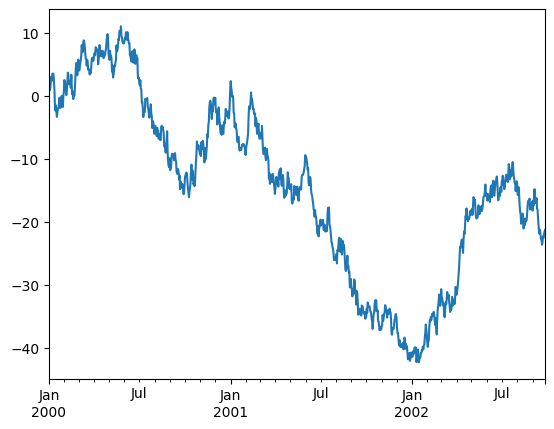

In [52]:
ts.plot()

In [53]:
# Generating a time series dataframe with multiple column labels
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df

,A,B,C,D
2000-01-01,-0.936615,0.904086,1.362003,-0.418791
2000-01-02,1.744736,-0.145797,0.795710,0.560110
2000-01-03,1.067634,0.129076,-0.720942,-0.327434
2000-01-04,-1.539348,-1.396236,-1.337612,-0.040572
2000-01-05,-1.028709,-0.775779,0.961646,-1.021050
...,...,...,...,...
2002-09-22,-0.660824,-1.273629,0.335434,0.051226
2002-09-23,-0.371134,-0.288250,1.480958,-0.555210
2002-09-24,0.334734,0.245979,1.840653,0.681347
2002-09-25,-0.423113,-0.178610,-1.544668,-0.375525


In [54]:
df = df.cumsum()

<AxesSubplot: title={'center': 'sales_data_plot'}, xlabel='date_range', ylabel='sales'>

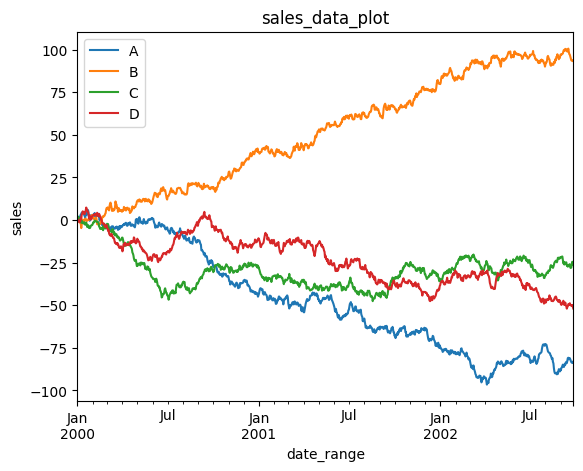

In [55]:
df.plot(xlabel='date_range', ylabel='sales', title='sales_data_plot')

## **Numpy**

[Back to contents](#table-of-contents)

### Numpy Installation

In [56]:
pip install numpy==1.24.1


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Numpy Usage  

* **Array Creation:**  
    arange, array, copy, empty, empty_like, eye, fromfile, fromfunction,
    identity, linspace, logspace, mgrid, ogrid, ones, ones_like, r, zeros, zeros_like  
* **Conversions:**  
    ndarray.astype, atleast_1d, atleast_2d, atleast_3d, mat
* **Manipulations:**  
    array_split, column_stack, concatenate, diagonal, dsplit, dstack, hsplit,
    hstack, ndarray.item, newaxis, ravel, repeat, reshape, resize, squeeze, swapaxes,
    take, transpose, vsplit, vstack  
* **Questions:**  
    all, any, nonzero, where  
* **Ordering:**  
    argmax, argmin, argsort, max, min, ptp, searchsorted, sort  
* **Operations:**  
    choose, compress, cumprod, cumsum, inner, ndarray.fill, imag, prod, put, putmask,
    real, sum  
* **Basic Statistics:**  
    cov, mean, std, var  
* **Basic Linear Algebra:**  
    cross, dot, outer, linalg.svd, vdot


In [57]:
import numpy as np

#### Numpy Array Creation  

[Back to contents](#table-of-contents)

In [58]:
# Generating a numpy array from list of elements
a = np.array([2,3,4])
a

array([2, 3, 4])

In [59]:
# Checking the data type in the numpy array
a.dtype

dtype('int32')

In [60]:
# Generating a numpy array with floating nos data type
b = np.array([(1.5,2,3), (4,5,6)])
b

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

In [61]:
# Generating a numpy array with complex nos data type
c = np.array([[1,2], [3,4]], dtype=complex )
c

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

In [62]:
# Generating a 2D - zero filled array of the 3 rows and 4 columns
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [63]:
# Generating a 3D - 1 filled array of the 3 rows and 4 columns
np.ones((2,3,4), dtype=np.int16)

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [64]:
# Generating numpy array with numbers between 0 and 2 for 9 numbers in total
np.linspace(0, 2, 9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

#### Numpy Printing Array

[Back to contents](#table-of-contents)

In [65]:
# Generating a 1D array
a = np.arange(6) 
print(a)

print('\n')

# Generating a 2D array
b = np.arange(12).reshape(4,3)
print(b)

print('\n')

# Generating a 3D array
c = np.arange(24).reshape(2,3,4) 
print(c)

[0 1 2 3 4 5]


[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


#### Numpy Operations

[Back to contents](#table-of-contents)

In [66]:
# All arithmetic operations occur in numpy arrays at element level
a = np.array([20,30,40,50])
b = np.arange(4)

c = a-b
print(c)
print(b**2)
print(10*np.sin(a))
print(a<30)

[20 29 38 47]
[0 1 4 9]
[ 9.12945251 -9.88031624  7.4511316  -2.62374854]
[ True False False False]


In [67]:
# Matrix level opeartions for 2 numpy arrays
A = np.array([[1,1],[0,1]])
B = np.array([[2,0],[3,4]])

print(A*B) # Element wise multiplication of 2 arrays
print(A@B) # Matrix multiplication of 2 arrays
print(A.dot(B)) # Dot product of 2 arrays

[[2 0]
 [0 4]]
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]


In [68]:
# Other array operations
a = np.random.random((2,3))

print(a.sum())
print(a.min())
print(a.max())

2.50064535926358
0.008713773566310645
0.9327484503962731


In [69]:
# Sum of each column
print(a.sum(axis=0))

# Min of each row
print(a.min(axis=1))

# Cumulative sum along each row
print(a.cumsum(axis=1))

[1.37002442 0.39860021 0.73202073]
[0.38988644 0.00871377]
[[0.43727597 0.8271624  1.55043154]
 [0.93274845 0.94146222 0.95021382]]


#### Numpy Universal Functions  

List of functions:  
**all, any, apply_along_axis, argmax, argmin, argsort, average, bincount, ceil, clip, conj,
corrcoef, cov, cross, cumprod, cumsum, diff, dot, floor, inner, inv, lexsort, max, maximum,
mean, median, min, minimum, nonzero, outer, prod, re, round, sort, std, sum, trace, transpose,
var, vdot, vectorize, where**

[Back to contents](#table-of-contents)

In [70]:
A = np.arange(3)
A

array([0, 1, 2])

In [71]:
# Perform exponential for each element in the array
np.exp(A)

array([1.        , 2.71828183, 7.3890561 ])

In [72]:
# Perform sq root for each element in the array
np.sqrt(A)

array([0.        , 1.        , 1.41421356])

In [73]:
C = np.array([2., -1., 4.])
np.add(A, C)

array([2., 0., 6.])

#### Numpy Indexing, Slicing & Iterating

[Back to contents](#table-of-contents)

In [74]:
# Generating a numpy array where each element if cubed again
a = np.arange(10)**3
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729], dtype=int32)

In [75]:
print(a[2]) # Getting an element in specific index
print(a[2:5]) # Getting a sub array by using index range
a[0:6:2] = 10000 # Replacing array values at 0, 2, 4 places to 10000
print(a)

8
[ 8 27 64]
[10000     1 10000    27 10000   125   216   343   512   729]


In [76]:
# Looping across elements in an array
for element in np.arange(10):
    print(element)

0
1
2
3
4
5
6
7
8
9


#### Numpy Shape Manipulation

[Back to contents](#table-of-contents)

In [77]:
# Generating a random array for shape manipulation
a = np.floor(10*np.random.random((3,4)))
a

array([[3., 6., 6., 1.],
       [1., 6., 0., 3.],
       [3., 0., 2., 7.]])

In [78]:
print(a.shape) # Prints the shape of the array i.e. no of rows, no  of columns (dimensions)
print(a.ravel()) # Prints the flattened array
print(a.reshape(6,2)) # Reshapes the array to newer dimensions
print(a.T) # Transposing an array
a.resize((6,2)) # Resize and Reshape are same but resize modifies the array permanently
print(a)

(3, 4)
[3. 6. 6. 1. 1. 6. 0. 3. 3. 0. 2. 7.]
[[3. 6.]
 [6. 1.]
 [1. 6.]
 [0. 3.]
 [3. 0.]
 [2. 7.]]
[[3. 1. 3.]
 [6. 6. 0.]
 [6. 0. 2.]
 [1. 3. 7.]]
[[3. 6.]
 [6. 1.]
 [1. 6.]
 [0. 3.]
 [3. 0.]
 [2. 7.]]


In [79]:
# Array Stacking (Vertical and Horizontal Stacking)
a = np.floor(10*np.random.random((2,2)))
b = np.floor(10*np.random.random((2,2)))
print(a)
print(b)

[[2. 8.]
 [4. 3.]]
[[8. 4.]
 [9. 4.]]


In [80]:
print(np.vstack((a,b))) # Vertical Stack one array on another
print(np.hstack((a,b))) # Horizontal Stack one array on another

[[2. 8.]
 [4. 3.]
 [8. 4.]
 [9. 4.]]
[[2. 8. 8. 4.]
 [4. 3. 9. 4.]]


In [81]:
# Array Splitting (Vertical and Horizontal Splitting)
a = np.floor(10*np.random.random((2,12)))
a

array([[1., 4., 8., 7., 5., 9., 3., 8., 7., 0., 4., 0.],
       [3., 1., 9., 9., 2., 5., 2., 2., 6., 6., 5., 1.]])

In [82]:
print(np.hsplit(a,3)) # Splitting into multiple vertical arrays

[array([[1., 4., 8., 7.],
       [3., 1., 9., 9.]]), array([[5., 9., 3., 8.],
       [2., 5., 2., 2.]]), array([[7., 0., 4., 0.],
       [6., 6., 5., 1.]])]


## **Matplotlib**

[Back to contents](#table-of-contents)

### Matplotlib Installation

### Matplotlib Usage

## **Plotly**

[Back to contents](#table-of-contents)

### Plotly Installation

### Plotly Usage